In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('questao1_coronavirus.csv', sep=';')
df['date'] = pd.to_datetime(df['date'])

In [3]:
df.head()

,date,state,city,new_confirmed,new_deaths,estimated_population_2019
0,2020-06-21,AC,Acrelândia,0,0,15256.0
1,2020-06-21,AC,Assis Brasil,0,0,7417.0
2,2020-06-21,AC,Brasiléia,0,0,26278.0
3,2020-06-21,AC,Bujari,4,0,10266.0
4,2020-06-21,AC,Capixaba,5,1,11733.0


In [4]:
df['day_of_the week'] = df['date'].dt.dayofweek
df['day_of_the week'].unique()

array([6, 5, 4, 3, 2, 1, 0], dtype=int64)

In [5]:
dias_traduzidos = { 0: 'Segunda', 
                   1: 'Terca',
                   2: 'Quarta',
                   3: 'Quinta',
                   4: 'Sexta',
                   5: 'Sabado',
                   6: 'Domingo'}

df['day_of_the week'] = df['day_of_the week'].map(dias_traduzidos)
df.head()

,date,state,city,new_confirmed,new_deaths,estimated_population_2019,day_of_the week
0,2020-06-21,AC,Acrelândia,0,0,15256.0,Domingo
1,2020-06-21,AC,Assis Brasil,0,0,7417.0,Domingo
2,2020-06-21,AC,Brasiléia,0,0,26278.0,Domingo
3,2020-06-21,AC,Bujari,4,0,10266.0,Domingo
4,2020-06-21,AC,Capixaba,5,1,11733.0,Domingo


In [6]:
df = df.sort_values(by='date')

In [7]:
#new freatures for cases confirmed

df['increase_new_confirmed'] = df['new_confirmed'].diff()
df['acceleration_new_confirmed'] = df['increase_new_confirmed'].diff()

#new features for new deaths
df['increase_new_deaths'] = df['new_deaths'].diff()
df['accelaration_new_deaths'] = df['increase_new_deaths'].diff()

df.head()

,date,state,city,new_confirmed,new_deaths,estimated_population_2019,day_of_the week,increase_new_confirmed,acceleration_new_confirmed,increase_new_deaths,accelaration_new_deaths
240648,2020-02-25,SP,São Paulo,1,0,12252023.0,Terca,NaN,NaN,NaN,NaN
240647,2020-02-26,SP,São Paulo,0,0,12252023.0,Quarta,-1.0,NaN,0.0,NaN
240646,2020-02-27,SP,São Paulo,0,0,12252023.0,Quinta,0.0,1.0,0.0,0.0
240645,2020-02-28,SP,São Paulo,1,0,12252023.0,Sexta,1.0,1.0,0.0,0.0
240644,2020-02-29,SP,São Paulo,0,0,12252023.0,Sabado,-1.0,-2.0,0.0,0.0


In [8]:
casos_agrupados_date = df.groupby(['date', 'state'])['new_confirmed', 'increase_new_confirmed',
                                                'acceleration_new_confirmed'].sum().round().reset_index()
casos_agrupados_date.head()

<ipython-input-8-960f77d7b4ef>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  casos_agrupados_date = df.groupby(['date', 'state'])['new_confirmed', 'increase_new_confirmed',


,date,state,new_confirmed,increase_new_confirmed,acceleration_new_confirmed
0,2020-02-25,SP,1,0.0,0.0
1,2020-02-26,SP,0,-1.0,0.0
2,2020-02-27,SP,0,0.0,1.0
3,2020-02-28,SP,1,1.0,1.0
4,2020-02-29,SP,0,-1.0,-2.0


In [9]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax=plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3,data=dataset)
    ax=ax
    

def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title( titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax
    
def plotar_bar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.barplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title( titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

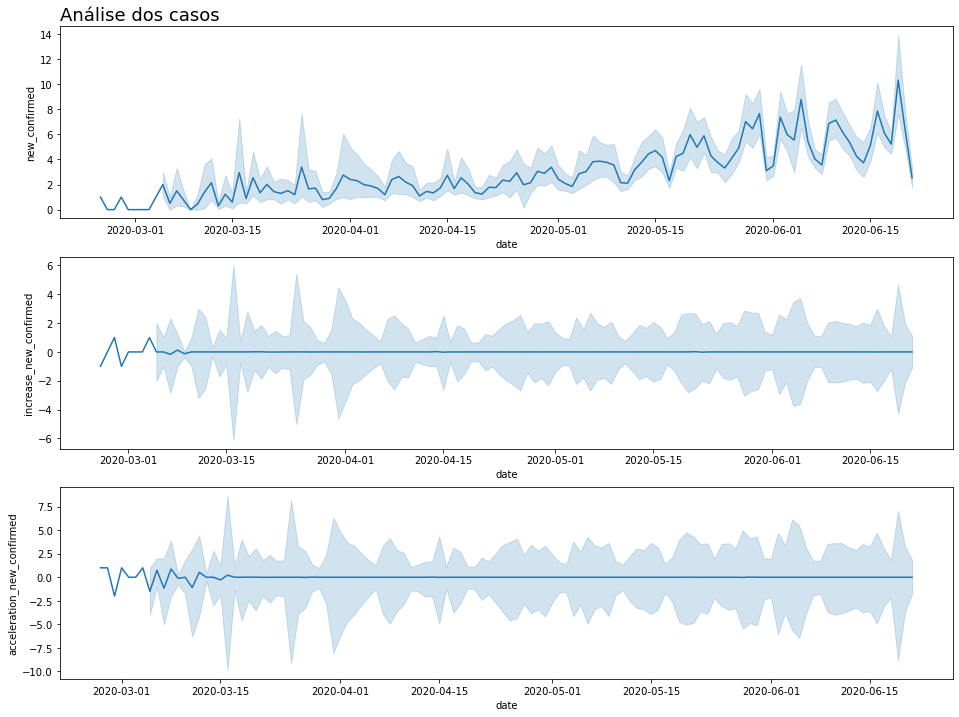

In [10]:
plot_comparacao('date', 'new_confirmed', 'increase_new_confirmed', 'acceleration_new_confirmed', df, 'Análise dos casos')

In [11]:
df_state = df.groupby('state')['new_confirmed', 'new_deaths'].sum().reset_index()
df_state

<ipython-input-11-07916e66c040>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_state = df.groupby('state')['new_confirmed', 'new_deaths'].sum().reset_index()


,state,new_confirmed,new_deaths
0,AC,11381,300
1,AL,28657,884
2,AM,63410,2657
3,AP,21840,359
4,BA,46280,1391
5,CE,92866,5523
6,DF,30902,396
7,ES,34866,1328
8,GO,15887,306
9,MA,70059,1721


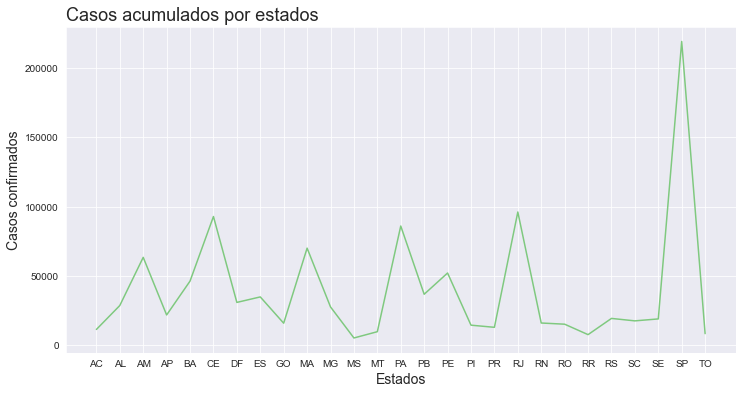

In [12]:
plotar('Casos acumulados por estados', 'Estados', 'Casos confirmados', df_state['state'], df_state['new_confirmed'], df_state)

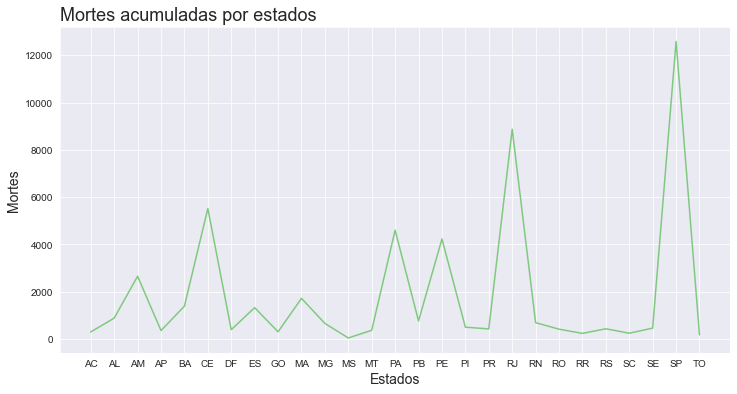

In [13]:
plotar('Mortes acumuladas por estados', 'Estados', 'Mortes', df_state['state'], df_state['new_deaths'], df_state)

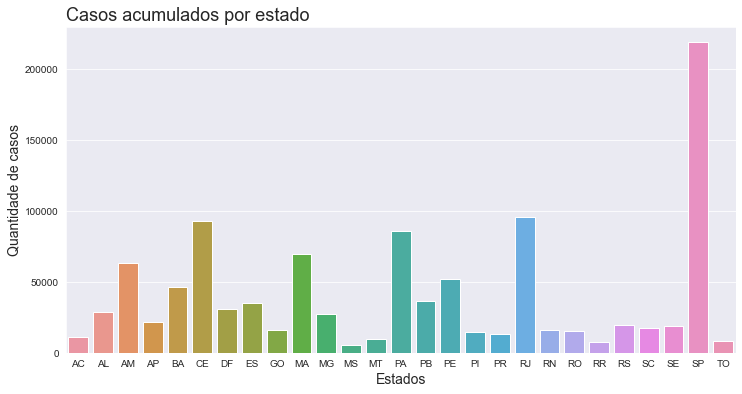

In [14]:
plotar_bar('Casos acumulados por estado', 'Estados',
           'Quantidade de casos', df_state['state'], df_state['new_confirmed'], df_state)

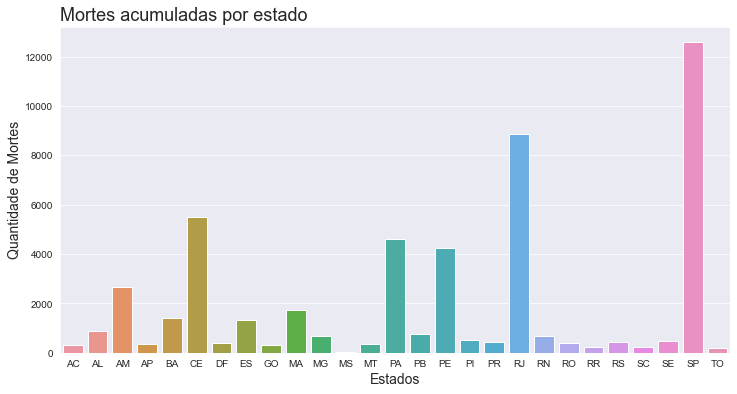

In [15]:
plotar_bar('Mortes acumuladas por estado', 'Estados',
           'Quantidade de Mortes', df_state['state'], df_state['new_deaths'], df_state)

In [16]:
df.head()

,date,state,city,new_confirmed,new_deaths,estimated_population_2019,day_of_the week,increase_new_confirmed,acceleration_new_confirmed,increase_new_deaths,accelaration_new_deaths
240648,2020-02-25,SP,São Paulo,1,0,12252023.0,Terca,NaN,NaN,NaN,NaN
240647,2020-02-26,SP,São Paulo,0,0,12252023.0,Quarta,-1.0,NaN,0.0,NaN
240646,2020-02-27,SP,São Paulo,0,0,12252023.0,Quinta,0.0,1.0,0.0,0.0
240645,2020-02-28,SP,São Paulo,1,0,12252023.0,Sexta,1.0,1.0,0.0,0.0
240644,2020-02-29,SP,São Paulo,0,0,12252023.0,Sabado,-1.0,-2.0,0.0,0.0


In [17]:
df_date = df.groupby('day_of_the week')['new_confirmed', 'new_deaths'].sum().reset_index()
df_date

<ipython-input-17-506ebe8f6112>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_date = df.groupby('day_of_the week')['new_confirmed', 'new_deaths'].sum().reset_index()


,day_of_the week,new_confirmed,new_deaths
0,Domingo,103409,4547
1,Quarta,168016,8135
2,Quinta,167194,8817
3,Sabado,164419,7041
4,Segunda,105762,5181
5,Sexta,206156,8421
6,Terca,164624,8463


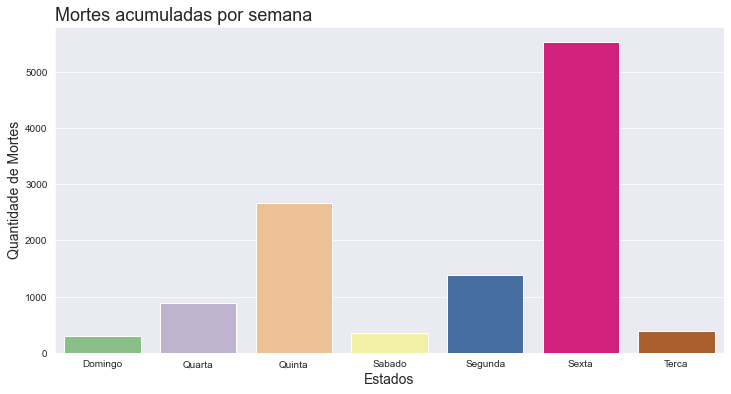

In [18]:
plotar_bar('Mortes acumuladas por semana', 'Estados',
           'Quantidade de Mortes', df_date['day_of_the week'], df_state['new_deaths'], df_date)

In [29]:
df_state1 = df.groupby('state')['new_confirmed', 'new_deaths'].sum().T

<ipython-input-29-8f56ca87ba28>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_state1 = df.groupby('state')['new_confirmed', 'new_deaths'].sum().T


In [30]:
df_state1

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
new_confirmed,11381,28657,63410,21840,46280,92866,30902,34866,15887,70059,...,12932,96133,16035,15181,7650,19348,17582,18985,219185,8354
new_deaths,300,884,2657,359,1391,5523,396,1328,306,1721,...,428,8875,693,417,239,434,246,462,12588,175
